In [1]:
from sklearn.datasets import load_breast_cancer

# Load the dataset
breast_cancer = load_breast_cancer()

# Separate features (X) and target (y)
X = breast_cancer.data
y = breast_cancer.target

In [2]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
%pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 7.6 MB/s eta 0:00:00


In [5]:
from catboost import CatBoostClassifier

# Instantiate and train the CatBoost classifier
catboost_model = CatBoostClassifier(verbose=0) # Set verbose to 0 to suppress training output
catboost_model.fit(X_train, y_train)

In [6]:
from sklearn.metrics import classification_report, confusion_matrix

# Make predictions on the test data
y_pred = catboost_model.predict(X_test)

# Generate and print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

Confusion Matrix:
[[41  2]
 [ 1 70]]


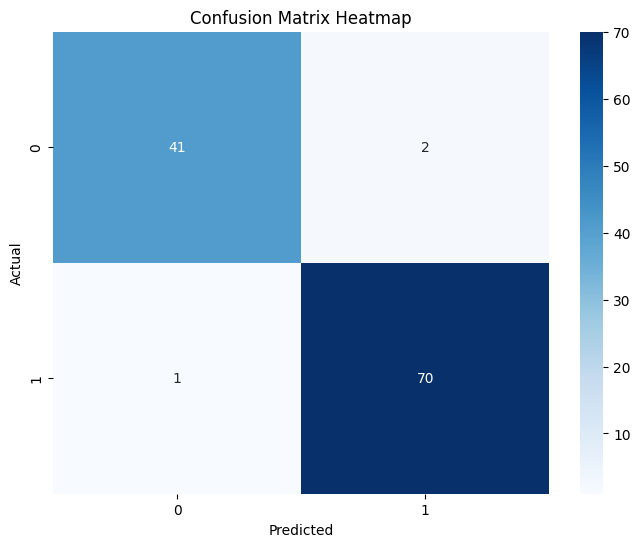

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

# Add labels and title
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix Heatmap")

# Display the plot
plt.show()